# 基於密度聚類(Density-Based Clustering)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm

# MNIST Dataset

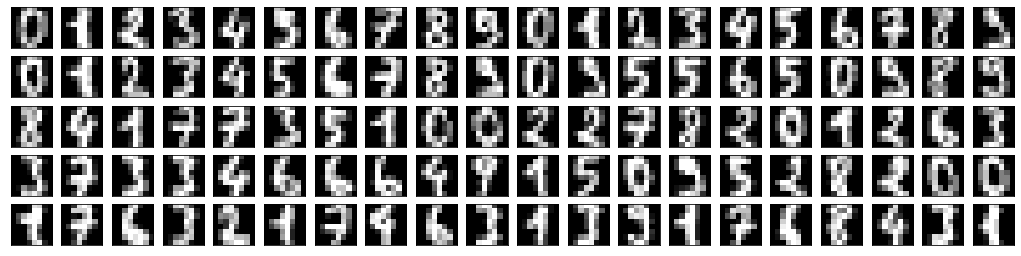

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=(digits.data/16)
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Original Data

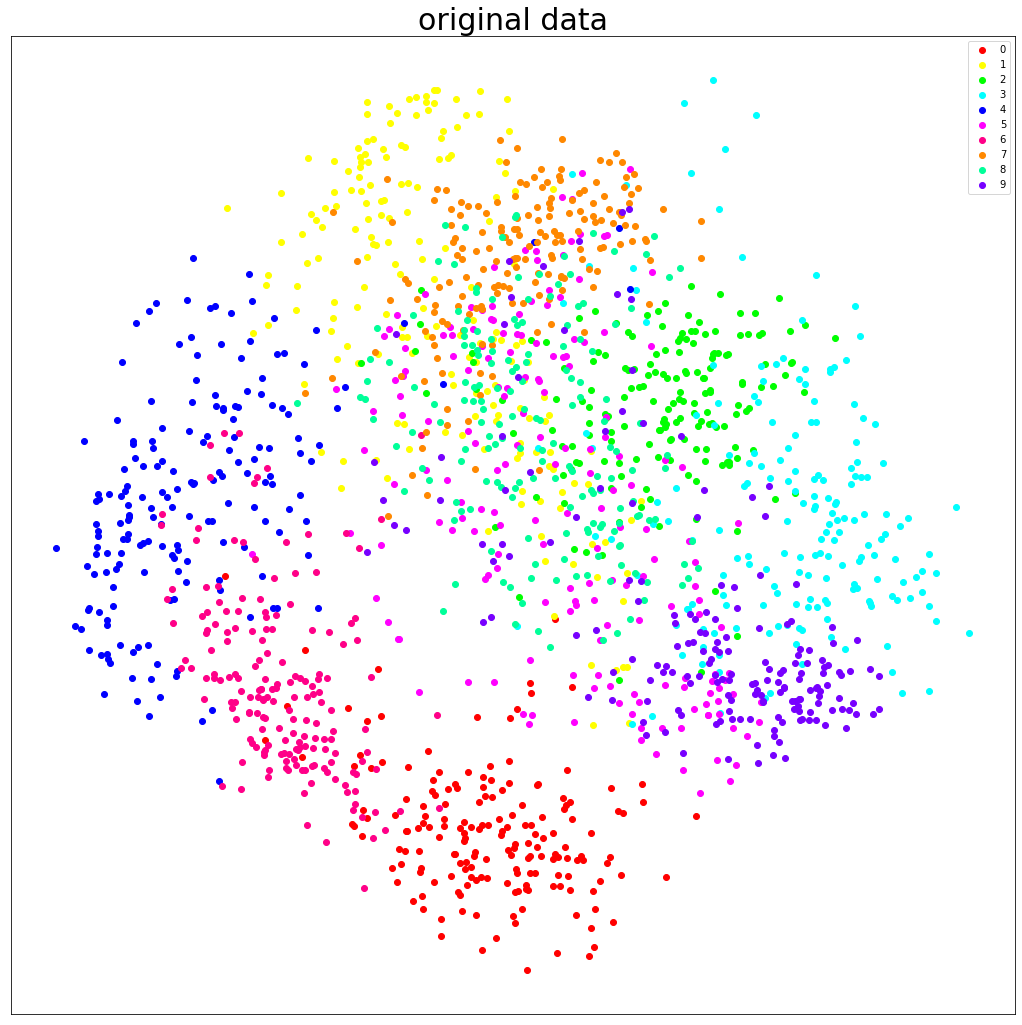

In [4]:
N=X.shape[0]
X_embedded=PCA(X,2,N)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,10):
    plt.scatter(X_embedded[(y==i),0],X_embedded[(y==i),1],c=color[i],label=i)
plt.title("original data",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()

# DENCLUE

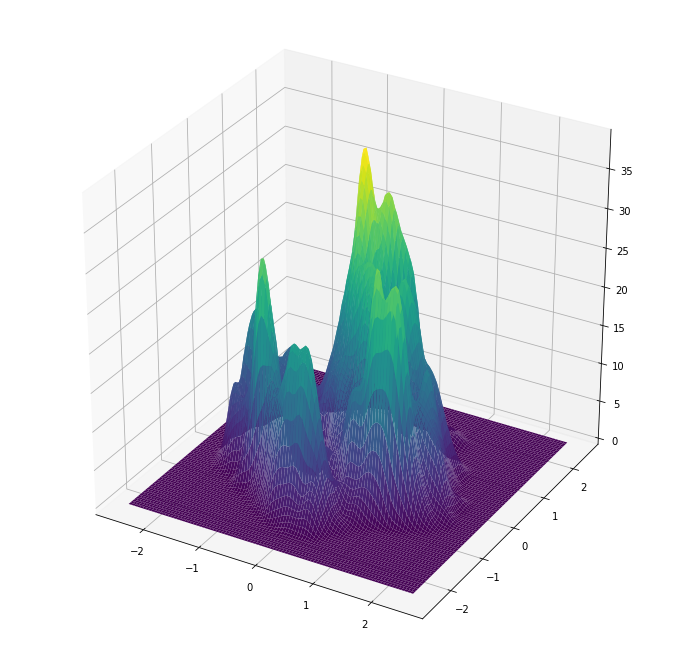

In [7]:
N,D=X.shape
sigma=0.1
X_embedded=PCA(X,2,N)
a = np.linspace(-2.5, 2.5, 100)
b = np.linspace(-2.5, 2.5, 100)
plt.rcParams["figure.figsize"] = (12,12)
C=np.zeros((len(a),len(b)))
A, B = np.meshgrid(a, b)
for i in tqdm(range(len(a))):
    for j in range(len(b)):
        C[i,j]=np.sum(np.exp(-((A[i,j]-X_embedded[:,0])**2+(B[i,j]-X_embedded[:,1])**2)/(2*sigma**2)))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, C, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.show()

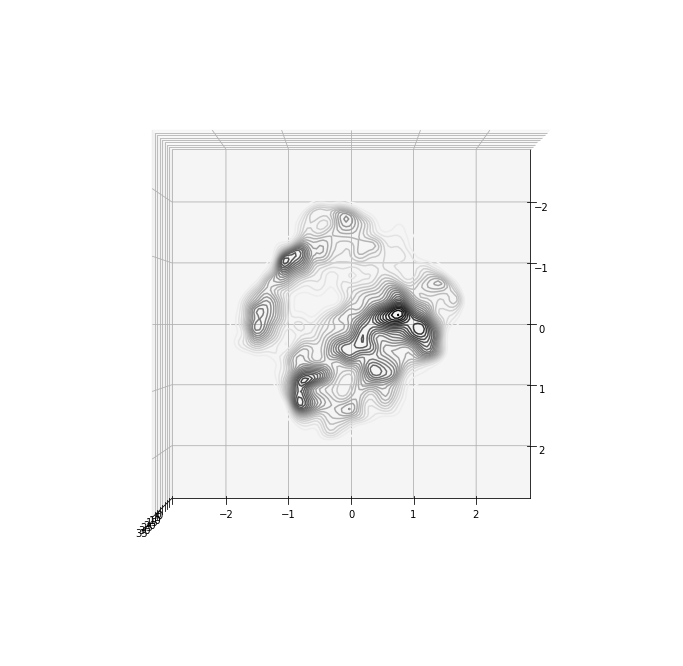

In [8]:
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(A, B, C, 30, cmap='binary')
ax.view_init(azim=0, elev=90)